# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Set values
mean = np.mean(df.temperature)
std = np.std(df.temperature)
n = len(df.temperature)

print(mean, std, n)

98.24923076923078 0.7303577789050377 130


### 1. Is the distribution of body temperatures normal?

The body temperature data has the following statistics: 
* Mean: 98.2
* Standard Deviation: 0.730
* Number of observations: 130

I used a historgam and q-q plot to show that the data is normally distributed:

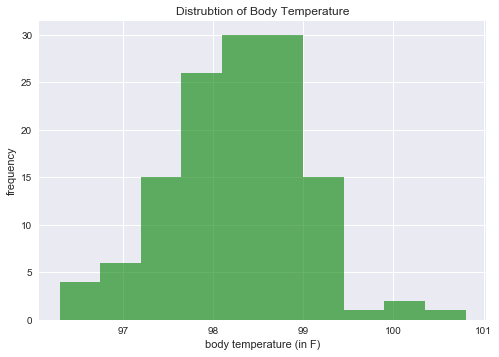

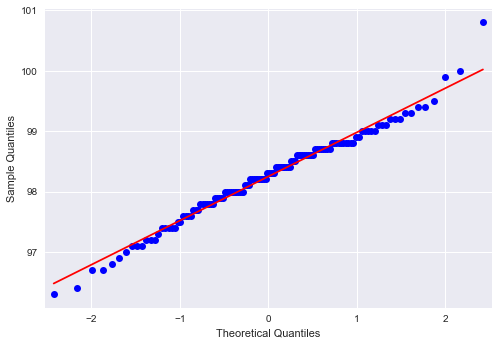

In [3]:
# Plot histogram of body temperature
plt.hist(df.temperature, alpha = 0.6, color='g')
plt.xlabel('body temperature (in F)')
plt.ylabel('frequency')
plt.title('Distrubtion of Body Temperature')
plt.show()

# create q-q plot
qqplot(df.temperature, line='s')
plt.show()

### 2. Is the sample size large? Are the observations independent?

Conventional wisdom says that sample size needs to be at least n=30 in order to be considered a sufficiently large sample. This dataset has 130 observations and satisifies this condition. The samples are independent because the body temperature of one individual has no impact on the temperature of another individual and all observations came from 130 different individuals. 

### 3. Is the true population mean really 98.6 degrees F?

In order to determine whether the population mean is actually 98.6 degrees F, I identified my hypotheses as follows: <br>
**H0:** The body temperature true population mean = 98.6 <br>
**H1:** The body temperature true population mean != 98.6 <br>

The significance level for this test is 5%

#### Bootstrap Hypothesis Test 

In [4]:
# Shift data so that the sample mean is now 98.6
temp_shift = df.temperature - np.mean(df.temperature) + 98.6

# Calculate the test statistic
def diff_from_nh(data, pop_mean=98.6):
    return np.mean(data) - pop_mean

diff_obs = diff_from_nh(df.temperature)

# Create functions for bootstrap sample
def bootstrap_replicate_1d(data,func):
    '''Generate bootstrap replicate of 1D data.'''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Compute the p-value
bs_replicates = draw_bs_reps(temp_shift, diff_from_nh, 10000)
p_value = np.sum(bs_replicates <= diff_obs) / 10000
print('p-value is:', p_value)

p-value is: 0.0


##### Results
The p-value of the bootstrap hypothesis test is 0% which is below the Significance Level of 5%. This means we should reject the null hypothesis that the true population mean is really 98.6 degrees F.

#### Frequentist Statistical Testing - One-Sample Test

Next, I did a one-sample z test to further confirm that I should reject the null hypothesis. I chose to do a one-sample test because I am using a single sample of body temperatures to test H0. The number of the observations in the dataset is greater than 30, so I should do a z-test. However, I am going to run a t-test as well so that I can compare the results.

In [5]:
import scipy.stats as stats

z = (mean-98.6)/(std/np.sqrt(n))
z

# calculate the p-value for the z statistic
p_z = stats.norm.cdf(z)*2

# calculate the t statistic
std_sample = np.std(df.temperature, ddof=1)
t = (mean-98.6)/(std_sample/np.sqrt(n))

# calculate the p-value for the t statistic 
p_t = stats.norm.cdf(t)*2

print('mean: ',mean)
print('standard deviation: ', std)
print('standard deviation of the sample: ', std_sample)
print('Number of Samples: ', n)
print('z-statistic = ', z, 'p-value = ', p_z)
print('t-statistic = ', t, 'p-value = ', p_t)


mean:  98.24923076923078
standard deviation:  0.7303577789050377
standard deviation of the sample:  0.7331831580389454
Number of Samples:  130
z-statistic =  -5.47592520208 p-value =  4.35231516588e-08
t-statistic =  -5.45482329236 p-value =  4.90215701411e-08


##### Results
The p-value for both the z-test and the t-test was less than the significance level of 5%, so I can reject H0.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests

When I took a random sample of the data and reduced the sample size from 130 to 10, I got a p-value of 17.2%. This is above the 5% significance level and would fail to reject the null hypothesis. I ran the test multiple times and each sample had a p-value that widely varied from .1 all the way to .92. Using a sample size this small does not produce consistent results and could result in a Type II error. 

In [8]:
# Draw sample 
s = np.random.choice(df.temperature, 10)

# calculate the z statistic
s_mean = np.mean(s)
s_std = np.std(s, ddof=0)
s_n = len(s)

s_zvalue = (s_mean-98.6)/(s_std/np.sqrt(s_n))

# calculate the p-value
s_pvalue_z = stats.norm.cdf(s_zvalue)*2

# calculate the t statistic
s_std_sample = np.std(s, ddof=1)
s_tvalue = (s_mean-98.6)/(s_std_sample/np.sqrt(s_n))

s_pvalue_t = stats.norm.cdf(s_tvalue)*2

print('mean: ', s_mean)
print('standard deviation: ', s_std)
print('standard deviation of the sample: ', s_std_sample)
print('Number of Samples: ', s_n)

print('z-statistic = ', s_zvalue, 'p-value = ', s_pvalue_z) 
print('t-statistic = ', s_tvalue, 'p-value = ', s_pvalue_t)

mean:  98.31
standard deviation:  0.637887137353
standard deviation of the sample:  0.672392081386
Number of Samples:  10
z-statistic =  -1.43765325831 p-value =  0.150532461547
t-statistic =  -1.36387763455 p-value =  0.172606080994


### 5. At what temperature should we consider someone's temperature to be "abnormal"?
In order to determine the 95% confidence interval, I used a z-score of 1.96 as the critical z-value. I then multiplied this by the standard deviation to get the margin of error. 

* Margin of Error: 1.43
* Confident Interval: 98.25 ± 1.43

A temperature is considered abnormal if is less than 96.8 and greater than 99.7. 

I tested the confidence interval and found that 93.8% of the data falls within the confidence interval. 

In [9]:
# Compute the Margin of Error
critical_z = 1.96 # taken from z-table 
margin_of_error = critical_z * (std)
print('Margin of Error: ',round(margin_of_error, 2))
print('Confidence Interval: ', round(mean,2), '±', round(margin_of_error,2))

low = mean - margin_of_error
high = mean + margin_of_error

belowCI = len(df[df.temperature < 96.82])
aboveCI = len(df[df.temperature > 99.68])
inCI = 100-((aboveCI + belowCI)*100/n)

print('A temperature is considered abnormal when it is below', round(low, 2), 'and above', round(high, 2))
print(round(inCI, 3),' percent of the observations in the data fall within the confidence interval')

Margin of Error:  1.43
Confidence Interval:  98.25 ± 1.43
A temperature is considered abnormal when it is below 96.82 and above 99.68
93.846  percent of the observations in the data fall within the confidence interval


## 6. Is there a significant difference between males and females in normal temperature?

**H0**: There is not a significant difference between males and females in normal temperature <br>
**H1**: There is a significant difference between males and females in normal temperature

In order to determine whether I should reject the null hypothesis, I used a z-test. 

* The difference of means between males and females is 0.289
* The critical value is 0.348

Because the difference of means is below the critical value, there is not enough evidence that H0 is false at the 95% confidence level. 

In [10]:
# filter for men
m_sample = df[df.gender == 'M']

# calculate statistics for men
m_mean = np.mean(m_sample.temperature)
m_std = np.std(m_sample.temperature, ddof=0)
m_n = len(m_sample.temperature)

# filter for women
f_sample = df[df.gender == 'F']

# calculate the statistics for women
f_mean = np.mean(f_sample.temperature)
f_std = np.std(f_sample.temperature, ddof=0)
f_n = len(f_sample.temperature)

# compute the difference of means
dom = abs(m_mean - f_mean)

# Compute the Standard Error
SE = m_std/np.sqrt(m_n) + f_std/np.sqrt(f_n)
critical_z = 1.96 # taken from z-table 
critical_value = critical_z * SE

    
print('Difference of Means is: ', dom)
print('Critical value is: ', critical_value)
if dom > margin_of_error:
    print('Diffence of means is above the critical value and reject the null hypothesis')
else:    
    print('Difference of means falls below the critical value and fail to reject null hypothesis')

Difference of Means is:  0.289230769230727
Critical value is:  0.347913512556
Difference of means falls below the critical value and fail to reject null hypothesis
